## classmethod

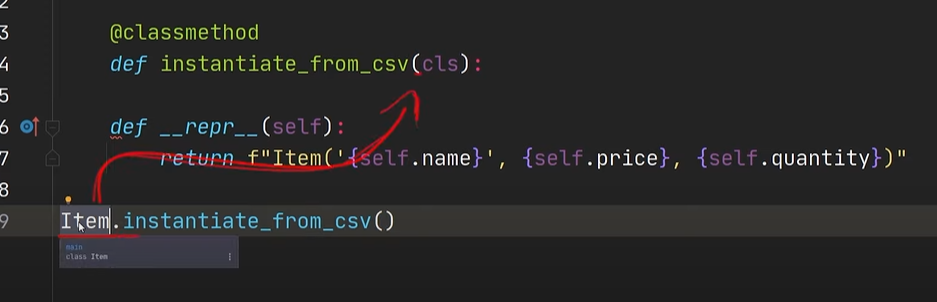

In [11]:
# now if we want to extend this appplication and add more feature then it will be difficult to manage things , so right now we are going to csv
import  csv

class Item:
    pay_rate = 0.8  
    all = []
    def __init__(self, name:str,price:float,quantity:int): 
        # run validation 
        assert price >=0,f"price `{price}` is not grater than zero!"
        assert quantity >=0 ,f"quantity `{quantity}` is not grater than zero!"
        #assign to self object 
        self.name = name
        self.price =price
        self.quantity = quantity
        
        # Action to exectue
        Item.all.append(self)  

    def calcilate_total_price(self):
        return self.price * self.quantity

    
    def apply_discount(self,):
        self.price =self.price * self.pay_rate     
        return self.price 

    @classmethod   # this is method is responsible for instanciating the object itself so this method could not be called from and instance so we need to convert this method  to class method
    def instantiate_from_csv(cls):  # so when we call our class method then class object is itself is passed as frst argument always in the background 
        with open('items.csv','r') as f:
            reader =  csv.DictReader(f) # this will read the csv as list of dictionary
            items = list(reader)   # converting reader into list


        for item in items:
            print(item)

    def __repr__(self) -> str:
        return f"Item({self.name!r},{self.price!r},{self.quantity!r})"
    


Item.instantiate_from_csv()

{'name': 'Phone', 'price': '100', 'quantity': '1'}
{'name': 'Laptop', 'price': '1000', 'quantity': '3'}
{'name': 'Cable', 'price': '10', 'quantity': '5'}
{'name': 'Mouse', 'price': '50', 'quantity': '5'}
{'name': 'Keyboard', 'price': '75', 'quantity': '5'}


In [12]:
# now e just need to create the instance for these 

In [13]:
import  csv

class Item:
    pay_rate = 0.8  
    all = []
    def __init__(self, name:str,price:float,quantity:int): 
        # run validation 
        assert price >=0,f"price `{price}` is not grater than zero!"
        assert quantity >=0 ,f"quantity `{quantity}` is not grater than zero!"
        #assign to self object 
        self.name = name
        self.price =price
        self.quantity = quantity
        
        # Action to exectue
        Item.all.append(self)  

    def calcilate_total_price(self):
        return self.price * self.quantity

    
    def apply_discount(self,):
        self.price =self.price * self.pay_rate     
        return self.price 

    @classmethod   
    def instantiate_from_csv(cls):
        with open('items.csv','r') as f:
            reader =  csv.DictReader(f) # this will read the csv as list of dictionary
            items = list(reader)   # converting reader into list


        for item in items:
            Item(
                name = item.get('name'),
                price = float(item.get('price')),
                quantity=  int(item.get('quantity')),
            )

    def __repr__(self) -> str:
        return f"Item({self.name!r},{self.price!r},{self.quantity!r})"
    


Item.instantiate_from_csv()
print(Item.all)

[Item('Phone',100.0,1), Item('Laptop',1000.0,3), Item('Cable',10.0,5), Item('Mouse',50.0,5), Item('Keyboard',75.0,5)]


## Staticmethod

In [14]:
import  csv

class Item:
    pay_rate = 0.8  
    all = []
    def __init__(self, name:str,price:float,quantity:int): 
        # run validation 
        assert price >=0,f"price `{price}` is not grater than zero!"
        assert quantity >=0 ,f"quantity `{quantity}` is not grater than zero!"
        #assign to self object 
        self.name = name
        self.price =price
        self.quantity = quantity
        
        # Action to exectue
        Item.all.append(self)  

    def calcilate_total_price(self):
        return self.price * self.quantity

    
    def apply_discount(self,):
        self.price =self.price * self.pay_rate     
        return self.price 

    @classmethod   
    def instantiate_from_csv(cls):
        with open('items.csv','r') as f:
            reader =  csv.DictReader(f) # this will read the csv as list of dictionary
            items = list(reader)   # converting reader into list


        for item in items:
            Item(
                name = item.get('name'),
                price = float(item.get('price')),
                quantity=  int(item.get('quantity')),
            )

    @staticmethod           # this means that this static method never sending in background the instance as first argument 
    def is_interger(num):   # stand alone or isolated function
        # we wll count out the float that are point zero

        #for i.e: 5.0, 10.0
        if isinstance(num, float):

            # count out the float that are point zero
            return num.is_integer()
        elif isinstance(num,int):
            return True
        else : 
            return False

    def __repr__(self) -> str:
        return f"Item({self.name!r},{self.price!r},{self.quantity!r})"
    

Item.is_interger(2.5)

False

In [15]:
# When to use class methods and when to use static methods ?

class Item:
    @staticmethod
    def is_integer():
        '''
        This should do something that has a relationship
        with the class, but not something that must be unique
        per instance!
        '''
    @classmethod
    def instantiate_from_something(cls):
        '''
        This should also do something that has a relationship
        with the class, but usually, those are used to
        manipulate different structures of data to instantiate
        objects, like we have done with CSV.
        '''

# THE ONLY DIFFERENCE BETWEEN THOSE:
# Static methods are not passing the object reference as the first argument in the background!


# NOTE: However, those could be also called from instances.

item1 = Item()    
item1.is_integer()   # this is also proosible to acess  the static method from the instnace
item1.instantiate_from_something()